In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel('telcom_data.xlsx')

In [3]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [5]:
# Identifying the top 10 handsets used by customers
top_10_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 Handsets:")
print(top_10_handsets)

# Identifying the top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("\nTop 3 Handset Manufacturers:")
print(top_3_manufacturers)

# Identifying the top 5 handsets per top 3 handset manufacturers
top_3_manufacturers_handsets = df[df['Handset Manufacturer'].isin(top_3_manufacturers.index)]
top_5_handsets_per_manufacturer = top_3_manufacturers_handsets.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).head(5)
print("\nTop 5 Handsets per Manufacturer:")
print(top_5_handsets_per_manufacturer)

# Interpretation and recommendation to marketing teams
print("\nInterpretation and Recommendation:")
print("The top 10 handsets used by customers give an idea of the popular devices among the users.")
print("The top 3 handset manufacturers show the dominant players in the market.")
print("The top 5 handsets per manufacturer provide insights into the popular devices from the leading manufacturers.")
print("Based on these findings, the marketing teams can focus their efforts on promoting the popular handsets and collaborating with the top manufacturers to create targeted marketing campaigns.")


Top 10 Handsets:
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

Top 3 Handset Manufacturers:
Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

Top 5 Handsets per Manufacturer:
Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A             

### Task 1.1: Aggregate user behavior information:

#### Group the data by user and calculate the following metrics: number of xDR sessions, session duration, total download and upload data, and total data volume for each application.
#### Create a new DataFrame with the aggregated information.

In [6]:
user_behavior = df.groupby('Bearer Id').agg({
    'Dur. (ms)': 'count',
    'Start ms': 'min',
    'End ms': 'max',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)' : 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()

# Display the resulting user behavior dataframe
print(user_behavior)







                   Bearer Id  Dur. (ms)  Start ms  End ms  Total DL (Bytes)  \
0        6917537518543529984          1     730.0   593.0      5.007220e+08   
1        6917537604825860096          1     833.0   699.0      7.095493e+08   
2        6917537608536819712          1     411.0   385.0      8.544659e+08   
3        6917537633966310400          1     833.0   486.0      8.257865e+08   
4        6917537638622189568          1       3.0    89.0      6.249578e+08   
...                      ...        ...       ...     ...               ...   
134704  13186541164985800704          1      72.0   962.0      3.870016e+08   
134705  13186541166737199104          1     986.0   950.0      8.726888e+08   
134706  13186541166776899584          1     368.0   286.0      3.863551e+08   
134707  13186541167134199808          1     211.0   571.0      3.272128e+08   
134708                              990       1.0   999.0      4.433009e+11   

        Total UL (Bytes)  Social Media DL (Bytes)  

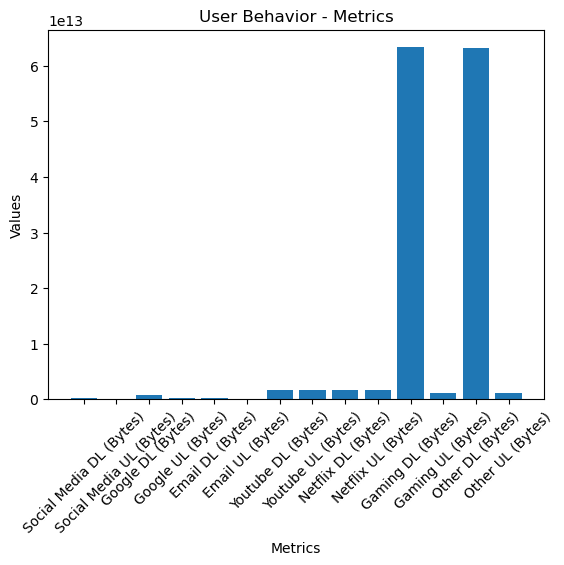

In [7]:
# Select the columns for box plot
Bar_metrics= [
"Social Media DL (Bytes)", "Social Media UL (Bytes)", "Google DL (Bytes)", "Google UL (Bytes)",
"Email DL (Bytes)", "Email UL (Bytes)", "Youtube DL (Bytes)", "Youtube UL (Bytes)", "Netflix DL (Bytes)",    
"Netflix UL (Bytes)","Gaming DL (Bytes)", "Gaming UL (Bytes)", "Other DL (Bytes)" , "Other UL (Bytes)" ]

values = user_behavior[Bar_metrics].sum()

# Create the bar chart
plt.bar(Bar_metrics, values)

# Set the plot title
plt.title('User Behavior - Metrics')

# Set the x-axis label
plt.xlabel('Metrics')

# Set the y-axis label
plt.ylabel('Values')

# Rotate the x-axis labels for better readability 
plt.xticks(rotation=45)

# Display the bar chart
plt.show()


### Task 1.2: Exploratory data analysis

In [8]:

# Handle missing values
user_behavior.fillna(user_behavior.mean(), inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_7272\1723001747.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  user_behavior.fillna(user_behavior.mean(), inplace=True)


In [9]:

# Analyze basic metrics
metrics = ['Dur. (ms)','Start ms', 'End ms','Total DL (Bytes)', 'Total UL (Bytes)']
basic_stats = user_behavior[metrics].describe()
print(basic_stats)




           Dur. (ms)       Start ms         End ms  Total DL (Bytes)  \
count  134709.000000  134709.000000  134709.000000      1.347090e+05   
mean        1.113511     484.134341     513.277049      5.062506e+08   
std         2.721729     288.763757     287.994948      1.245762e+09   
min         1.000000       0.000000       0.000000      8.827082e+06   
25%         1.000000     233.000000     267.000000      2.614762e+08   
50%         1.000000     477.000000     521.000000      4.877186e+08   
75%         1.000000     732.000000     765.000000      7.064628e+08   
max       990.000000     999.000000     999.000000      4.433009e+11   

       Total UL (Bytes)  
count      1.347090e+05  
mean       4.578893e+07  
std        1.120691e+08  
min        2.866892e+06  
25%        3.407374e+07  
50%        4.252730e+07  
75%        5.177022e+07  
max        4.053185e+10  


In [10]:
# Non-Graphical Univariate Analysis
dispersion_params = user_behavior[metrics].std()
print(dispersion_params)


Dur. (ms)           2.721729e+00
Start ms            2.887638e+02
End ms              2.879949e+02
Total DL (Bytes)    1.245762e+09
Total UL (Bytes)    1.120691e+08
dtype: float64


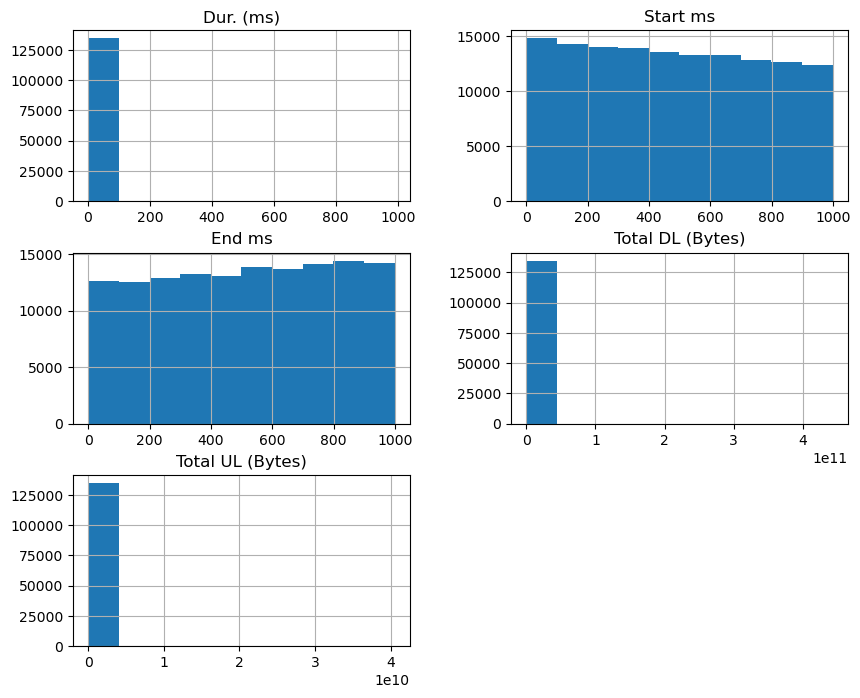

In [15]:

# Graphical Univariate Analysis
user_behavior.hist(column=metrics, bins=10, figsize=(10, 8))
plt.ylabel("Frequency")
plt.show()


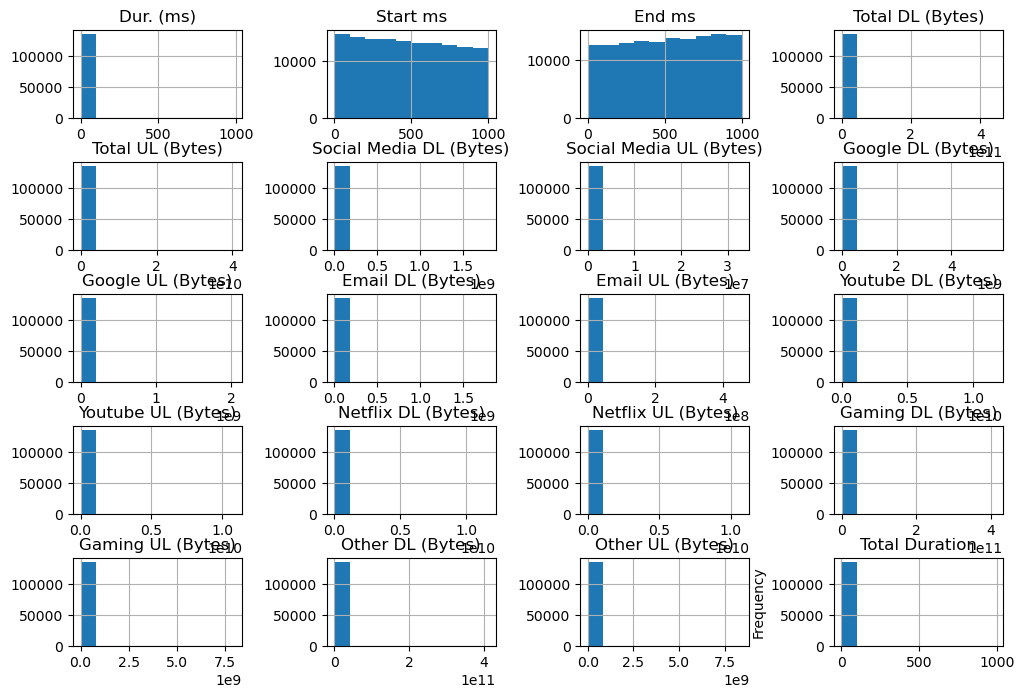

In [30]:
user_behavior.hist(bins=10, figsize=(12, 8))
plt.ylabel("Frequency")
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Increase the values to increase the distance

# Show the figure
plt.show()

In [16]:
# Bivariate Analysis
corr_matrix = user_behavior[["Social Media DL (Bytes)", "Social Media UL (Bytes)", "Google DL (Bytes)", "Google UL (Bytes)",
"Email DL (Bytes)", "Email UL (Bytes)", "Youtube DL (Bytes)", "Youtube UL (Bytes)", "Netflix DL (Bytes)",    
"Netflix UL (Bytes)","Gaming DL (Bytes)", "Gaming UL (Bytes)", "Other DL (Bytes)" , "Other UL (Bytes)"]].corr()
print(corr_matrix)



                         Social Media DL (Bytes)  Social Media UL (Bytes)  \
Social Media DL (Bytes)                 1.000000                 0.953601   
Social Media UL (Bytes)                 0.953601                 1.000000   
Google DL (Bytes)                       0.952435                 0.952555   
Google UL (Bytes)                       0.953025                 0.953107   
Email DL (Bytes)                        0.953717                 0.953753   
Email UL (Bytes)                        0.952224                 0.952336   
Youtube DL (Bytes)                      0.953731                 0.953734   
Youtube UL (Bytes)                      0.953007                 0.952907   
Netflix DL (Bytes)                      0.953433                 0.953681   
Netflix UL (Bytes)                      0.952625                 0.952399   
Gaming DL (Bytes)                       0.952401                 0.952347   
Gaming UL (Bytes)                       0.952089                 0.951957   

C:\Users\Admin\AppData\Local\Temp\ipykernel_7272\272661027.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_usage_per_category = user_behavior.groupby('Data Usage Category')['Total DL (Bytes)', 'Total UL (Bytes)'].sum()


                     Total DL (Bytes)  Total UL (Bytes)
Data Usage Category                                    
Very Low                 0.000000e+00      0.000000e+00
Low                      0.000000e+00      0.000000e+00
Medium                   0.000000e+00      0.000000e+00
High                     0.000000e+00      0.000000e+00
Very High                6.819651e+13      6.168181e+12


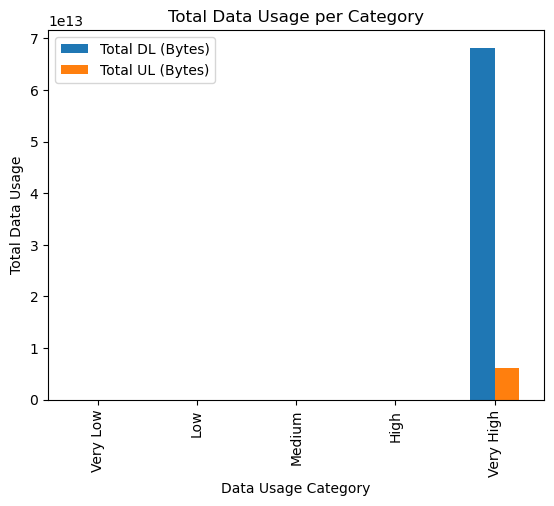

In [27]:

# Define the bins and labels for variable transformation
bins = [0, 500, 1000, 1500, 2000, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Create a new column based on the bins and labels
user_behavior['Data Usage Category'] = pd.cut(user_behavior['Total DL (Bytes)'] + user_behavior['Total UL (Bytes)'],
                                             bins=bins,
                                             labels=labels)

# Compute the total data usage per category
data_usage_per_category = user_behavior.groupby('Data Usage Category')['Total DL (Bytes)', 'Total UL (Bytes)'].sum()

# Print the results
print(data_usage_per_category)
# Plot the data usage per category
data_usage_per_category.plot(kind='bar')
plt.xlabel('Data Usage Category')
plt.ylabel('Total Data Usage')
plt.title('Total Data Usage per Category')
plt.show()




In [28]:
correlation_matrix = user_behavior[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                                   'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)',
                                   'Other DL (Bytes)']].corr()

print(correlation_matrix)


                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000           0.952435   
Google DL (Bytes)                       0.952435           1.000000   
Email DL (Bytes)                        0.953717           0.952365   
Youtube DL (Bytes)                      0.953731           0.952810   
Netflix DL (Bytes)                      0.953433           0.952429   
Gaming DL (Bytes)                       0.952401           0.951298   
Other DL (Bytes)                        0.952808           0.951219   

                         Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)          0.953717            0.953731   
Google DL (Bytes)                0.952365            0.952810   
Email DL (Bytes)                 1.000000            0.953759   
Youtube DL (Bytes)               0.953759            1.000000   
Netflix DL (Bytes)               0.953588            0.953690   
Gaming DL (Bytes)                0.952317

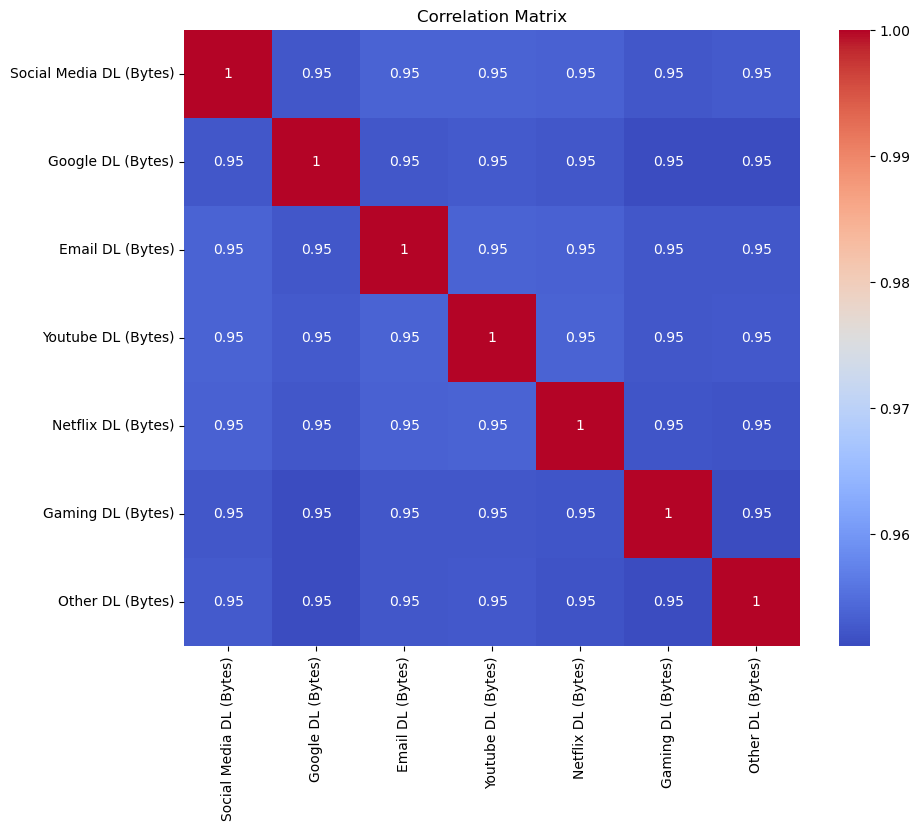

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [26]:
# Calculate the total duration for all sessions for each user
user_behavior['Total Duration'] = user_behavior['Dur. (ms)'].sum(level=0)

# Create deciles based on the total duration
user_behavior['Total Duration Decile'] = pd.qcut(user_behavior['Total Duration'], q=10, duplicates='drop')

# Group the data by decile class and calculate the sum of total data
data_usage_per_decile = user_behavior.groupby('Total Duration Decile')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()

# Print the data usage per decile class
print(data_usage_per_decile)


C:\Users\Admin\AppData\Local\Temp\ipykernel_7272\2251192093.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  user_behavior['Total Duration'] = user_behavior['Dur. (ms)'].sum(level=0)


                       Total DL (Bytes)  Total UL (Bytes)
Total Duration Decile                                    
(0.999, 990.0]             6.819651e+13      6.168181e+12


In [18]:
# Dimensionality Reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(user_behavior[["Social Media DL (Bytes)", "Social Media UL (Bytes)", "Google DL (Bytes)", "Google UL (Bytes)",
"Email DL (Bytes)", "Email UL (Bytes)", "Youtube DL (Bytes)", "Youtube UL (Bytes)", "Netflix DL (Bytes)",    
"Netflix UL (Bytes)","Gaming DL (Bytes)", "Gaming UL (Bytes)", "Other DL (Bytes)" , "Other UL (Bytes)"]])
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(principal_df.head())

            PC1           PC2
0  1.397223e+08  1.454846e+08
1  1.667373e+08 -1.206009e+08
2  2.509305e+08 -2.459902e+08
3 -7.730007e+07 -5.515259e+08
4  2.329907e+08  7.240886e+07


Variance Explained by PC1: 0.9754649299732895
Variance Explained by PC2: 0.024392028311013506


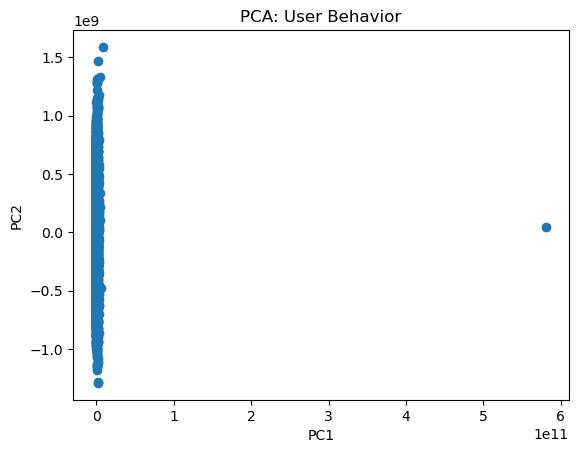

In [19]:
# Create DataFrame for principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print("Variance Explained by PC1:", explained_variance[0])
print("Variance Explained by PC2:", explained_variance[1])

# Scatter plot of principal components
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: User Behavior')
plt.show()


Variance Explained represents the proportion of the total variance in the original data that is captured by each principal component. 

Variance Explained by PC1: 0.9754649299732892
- PC1 explains approximately 97.55% of the total variance in the data.
- This indicates that PC1 captures a significant amount of information and is a dominant component in explaining the variability in the dataset.

Variance Explained by PC2: 0.02439202831101357
- PC2 explains approximately 2.44% of the total variance in the data.
- PC2 captures a relatively smaller portion of the variance compared to PC1.
- Although it contributes less to the overall variance, PC2 still provides valuable information about the dataset's variability beyond what is explained by PC1.

The cumulative variance explained by the principal components can also be calculated by summing up the individual variances. 
In this case, the cumulative variance would be 0.9998569582843027, indicating that the combination of PC1 and PC2 captures almost all of the total variance in the dataset (99.99%). This suggests that these two principal components are highly informative and can effectively summarize the patterns and variability in the original data.

In [20]:
# Interpretation of Loadings
loadings = pca.components_.T  # Transpose to match variables with loadings
variables = ["Social Media DL", "Social Media UL", "Google DL", "Google UL", "Email DL", "Email UL",
             "Youtube DL", "Youtube UL", "Netflix DL", "Netflix UL", "Gaming DL", "Gaming UL",
             "Other DL", "Other UL"]
loadings_df = pd.DataFrame(data=loadings, columns=['PC1', 'PC2'], index=variables)
print("Loadings:")
print(loadings_df)

Loadings:
                      PC1           PC2
Social Media DL  0.003007  2.737029e-05
Social Media UL  0.000055 -4.241594e-08
Google DL        0.009373 -1.033959e-05
Google UL        0.003415  1.711085e-05
Email DL         0.003000  6.628812e-06
Email UL         0.000764 -3.353194e-07
Youtube DL       0.019580  9.027986e-05
Youtube UL       0.018202  1.694942e-04
Netflix DL       0.019513 -6.340408e-05
Netflix UL       0.018024 -5.768945e-05
Gaming DL        0.706633 -7.069051e-01
Gaming UL        0.013374 -3.004521e-06
Other DL         0.706225  7.073084e-01
Other UL         0.014127  8.509708e-05


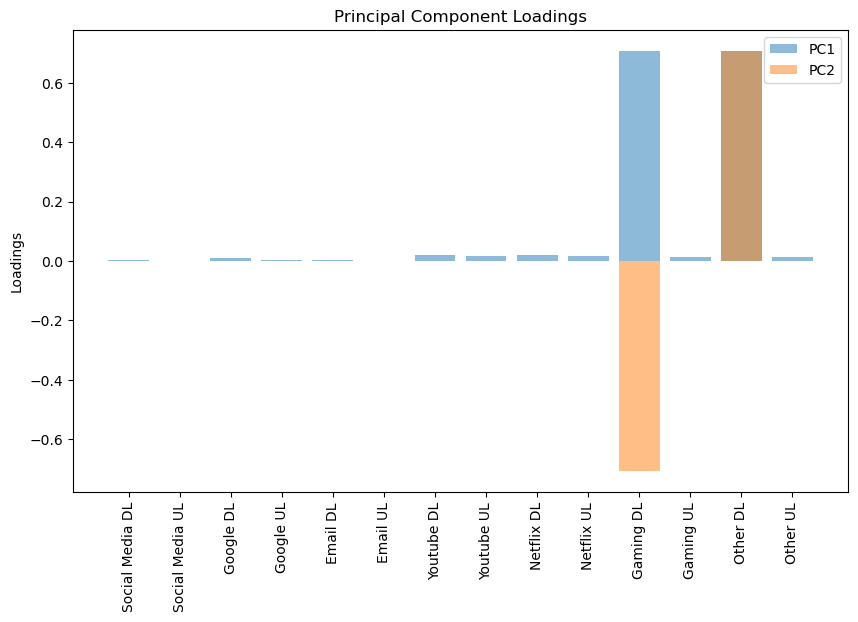

In [21]:

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the loadings
plt.bar(range(len(loadings_df)), loadings_df['PC1'], alpha=0.5, label='PC1')
plt.bar(range(len(loadings_df)), loadings_df['PC2'], alpha=0.5, label='PC2')

# Set the x-axis ticks and labels
plt.xticks(range(len(loadings_df)), loadings_df.index, rotation=90)

# Set the y-axis label
plt.ylabel('Loadings')

# Set the title of the plot
plt.title('Principal Component Loadings')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In PCA, loadings represent the correlation between the original variables and the principal components. 
The loadings indicate the contribution of each variable to the construction of the principal components. 

PC1:
- Variables with high positive loadings: Gaming DL (0.706633) and Other DL (0.706225).
- This suggests that PC1 is strongly influenced by data related to gaming activities.

PC2:
- Variables with high positive loadings: Gaming UL (7.073084e-01) and Other UL (8.509708e-05).
- This indicates that PC2 is mainly driven by data related to gaming activities, specifically the upload data.

Variables with low loadings (close to zero) in both PC1 and PC2:
- Social Media DL, Social Media UL, Google DL, Google UL, Email DL, Email UL, Youtube DL, Youtube UL, Netflix DL, and Netflix UL.
- These variables have minimal influence on the construction of the principal components.

